In [2]:
import numpy as np
import matplotlib.pyplot as plt
import gsmt
from gsmt import (
    sim_params,
    filters,
    tmt_conf,
    elt_conf,
    gmt_conf,
    sim_gsmt_jones_pupil,
    create_elt_aperture_and_phase,
    create_tmt_aperture_and_phase
)

In [7]:
sim_params['wavelength'] = filters['I'] * 1e-6
sim_params['order'] = 2
sim_params['npix_pupil'] = 1024
sim_params['segment variation'] = False
sim_params['poke.Rayfront'] = 'rayfronts/ELT.msgpack'

wfout = sim_gsmt_jones_pupil(sim_params, elt_conf)

In [28]:
pth = '/Users/jashcraft/Desktop/polarization-gsmts-II/25trials_order2_ELT_Iband_primaryvar_20pct.npy'
load_dat = np.load(pth)

def reg_radial_profile(data, center):
    y, x = np.indices((data.shape))
    r = np.sqrt((x - center[0])**2 + (y - center[1])**2)
    r = r.astype(np.int)

    tbin = np.bincount(r.ravel(), data.ravel())
    nr = np.bincount(r.ravel())
    radialprofile = tbin / nr
    return radialprofile 

profiles = []
for d in load_dat:
    pro = reg_radial_profile(d - wfout.power.shaped, [75,75])
    profiles.append(pro)


<ipython-input-28-92e9942437f6>:7: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  r = r.astype(np.int)


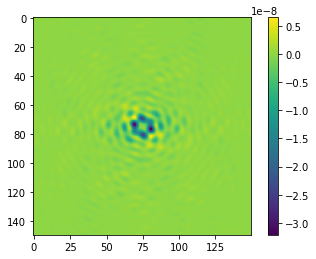

In [29]:
plt.imshow(load_dat[0] - load_dat[1])
plt.colorbar()

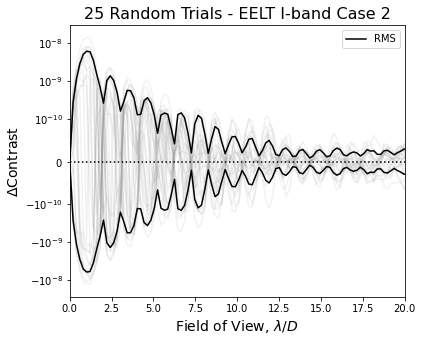

In [32]:
xvals = np.linspace(0, len(profiles[0])/sim_params['q_focal'],len(profiles[0]))
plt.figure(figsize=[6,5])
plt.plot(xvals, np.array(profiles).T, color='gray', alpha=0.1)
plt.plot(xvals, np.std(profiles, axis=0), color='black', label='RMS')
plt.plot(xvals, -np.std(profiles, axis=0), color='black')
plt.yscale('symlog', linthresh=1e-10)
plt.plot(xvals, np.zeros_like(profiles[0]), linestyle='dotted', color='black')
# plt.ylim(1e-12,1e-7)
plt.xlim([0,20])
plt.ylabel(r'$\Delta$' + 'Contrast',fontsize=14)
plt.xlabel('Field of View, '+r'$\lambda / D$',fontsize=14)
plt.title('25 Random Trials - EELT I-band Case 2', fontsize=16)
plt.legend()